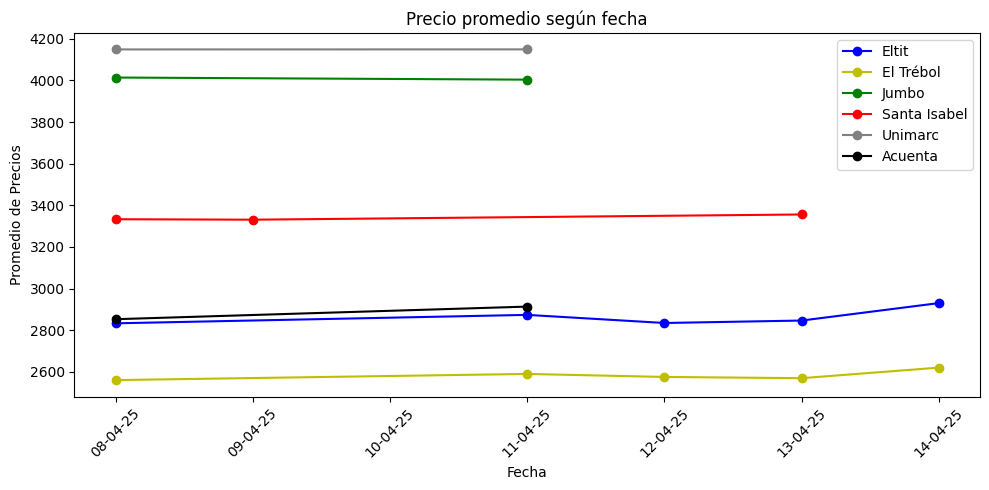

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime
import matplotlib.dates as mdates

promedio_eltit = []
fechas_eltit = []

for child in Path('../eltit/results/').iterdir():
    if child.is_file():
        data = pd.read_csv(child)

        data['Precio'] = pd.to_numeric(data['Precio'], errors='coerce')
        promedio_eltit.append(data['Precio'].mean())
        fechas_eltit.append(datetime.strptime(child.name.replace(".csv", ""), "%d-%m-%Y").date())

fechas_eltit, promedio_eltit = zip(*sorted(zip(fechas_eltit, promedio_eltit)))

promedio_eltrebol = []
fechas_eltrebol = []

for child in Path('../eltrebol/results/').iterdir():
    if child.is_file():
        data = pd.read_csv(child)

        data['Precio'] = pd.to_numeric(data['Precio'], errors='coerce')
        promedio_eltrebol.append(data['Precio'].mean())
        fechas_eltrebol.append(datetime.strptime(child.name.replace(".csv", ""), "%d-%m-%Y").date())

fechas_eltrebol, promedio_eltrebol = zip(*sorted(zip(fechas_eltrebol, promedio_eltrebol)))


promedio_jumbo = []
fechas_jumbo = []

for child in Path('../jumbo/results/').iterdir():
    if child.is_file():
        data = pd.read_csv(child)

        data['Precio'] = pd.to_numeric(data['Precio'], errors='coerce')
        promedio_jumbo.append(data['Precio'].mean())
        fechas_jumbo.append(datetime.strptime(child.name.replace(".csv", ""), "%d-%m-%Y").date())

fechas_jumbo, promedio_jumbo = zip(*sorted(zip(fechas_jumbo, promedio_jumbo)))

promedio_santaisabel = []
fechas_santaisabel = []

for child in Path('../santaisabel/results/').iterdir():
    if child.is_file():
        data = pd.read_csv(child)

        data['Precio'] = pd.to_numeric(data['Precio'], errors='coerce')
        promedio_santaisabel.append(data['Precio'].mean())
        fechas_santaisabel.append(datetime.strptime(child.name.replace(".csv", ""), "%d-%m-%Y").date())

fechas_santaisabel, promedio_santaisabel = zip(*sorted(zip(fechas_santaisabel, promedio_santaisabel)))

promedio_unimarc = []
fechas_unimarc = []

for child in Path('../unimarc/results/').iterdir():
    if child.is_file():
        data = pd.read_csv(child)

        data['Precio'] = pd.to_numeric(data['Precio'], errors='coerce')
        promedio_unimarc.append(data['Precio'].mean())
        fechas_unimarc.append(datetime.strptime(child.name.replace(".csv", ""), "%d-%m-%Y").date())

fechas_unimarc, promedio_unimarc = zip(*sorted(zip(fechas_unimarc, promedio_unimarc)))

promedio_acuenta = []
fechas_acuenta = []

for child in Path('../acuenta/results/').iterdir():
    if child.is_file():
        data = pd.read_csv(child)

        data['Precio'] = pd.to_numeric(data['Precio'], errors='coerce')
        promedio_acuenta.append(data['Precio'].mean())
        fechas_acuenta.append(datetime.strptime(child.name.replace(".csv", ""), "%d-%m-%Y").date())

fechas_acuenta, promedio_acuenta = zip(*sorted(zip(fechas_acuenta, promedio_acuenta)))

plt.figure(figsize=(10, 5))

plt.plot(fechas_eltit, promedio_eltit, marker='o', color='b', label='Eltit')
plt.plot(fechas_eltrebol, promedio_eltrebol, marker='o', color='y', label='El Trébol')
plt.plot(fechas_jumbo, promedio_jumbo, marker='o', color='g', label='Jumbo')
plt.plot(fechas_santaisabel, promedio_santaisabel, marker='o', color='r', label='Santa Isabel')
plt.plot(fechas_unimarc, promedio_unimarc, marker='o', color='gray', label='Unimarc')
plt.plot(fechas_acuenta, promedio_acuenta, marker='o', color='black', label='Acuenta')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y')) 
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.xlabel('Fecha')
plt.ylabel('Promedio de Precios')
plt.title('Precio promedio según fecha')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.savefig('graph.png', bbox_inches='tight')
plt.show()

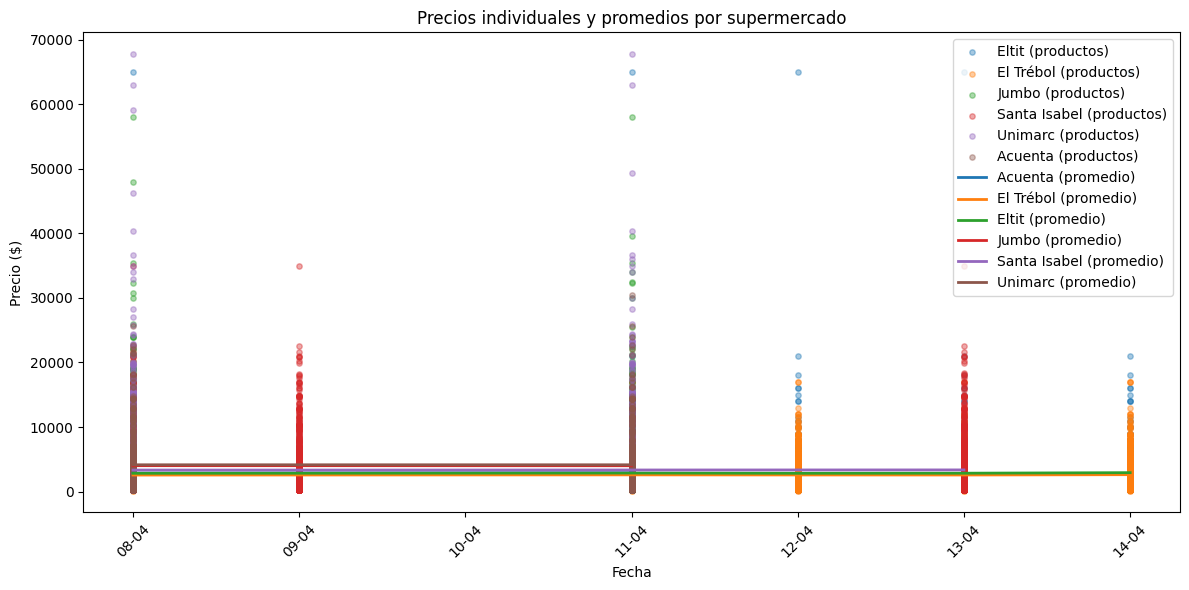

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime
import matplotlib.dates as mdates

# Diccionario de rutas
supermercados = {
    "Eltit": "../eltit/results/",
    "El Trébol": "../eltrebol/results/",
    "Jumbo": "../jumbo/results/",
    "Santa Isabel": "../santaisabel/results/",
    "Unimarc": "../unimarc/results/",
    "Acuenta": "../acuenta/results/"
}

precios_totales = []

for nombre, path in supermercados.items():
    for archivo in Path(path).iterdir():
        if archivo.is_file():
            try:
                df = pd.read_csv(archivo)
                df.columns = df.columns.str.strip()  # limpiar espacios
                df['Precio'] = pd.to_numeric(df['Precio'], errors='coerce')
                df['Fecha'] = datetime.strptime(archivo.name.replace(".csv", ""), "%d-%m-%Y").date()
                df['Supermercado'] = nombre
                precios_totales.append(df[['Fecha', 'Precio', 'Supermercado']])
            except Exception as e:
                print(f"⚠️ Error en {archivo.name}: {e}")

# Unir todos los datos
df_total = pd.concat(precios_totales, ignore_index=True)

# Preparar figura
plt.figure(figsize=(12, 6))

# Puntos individuales
for nombre in df_total['Supermercado'].unique():
    datos = df_total[df_total['Supermercado'] == nombre]
    plt.scatter(datos['Fecha'], datos['Precio'], label=f'{nombre} (productos)', s=15, alpha=0.4)

# Línea de promedios
medias = df_total.groupby(['Supermercado', 'Fecha'])['Precio'].mean().reset_index()

for nombre in medias['Supermercado'].unique():
    datos_media = medias[medias['Supermercado'] == nombre]
    plt.plot(datos_media['Fecha'], datos_media['Precio'], label=f'{nombre} (promedio)', linewidth=2)

# Estilo eje X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

plt.title("Precios individuales y promedios por supermercado")
plt.xlabel("Fecha")
plt.ylabel("Precio ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()
